# **HW 1: Exploratory Data Analysis and Dimensionality Reduction in Wine Dataset**
**HW Due date is 02/15/2024, 2:00 pm**

In this assignment, you will analyze the Wine dataset, which contains the results of a chemical analysis of wines grown in a specific region in Italy, derived from three different cultivars (classes). The dataset consists of various chemical properties present in the wines, making it suitable for classification and clustering tasks.

The goals of this assignment are to perform exploratory data analysis (EDA),handle missing data, standardize the data, and apply dimensionality reduction techniques to understand the underlying structure of the dataset.

# The Wine Dataset:`
The dataset consists of the following features:

* Alcohol: The alcohol content of the wine.
* Malic Acid: The malic acid content of the wine.
* Ash: The ash content of the wine.
* Alcalinity of Ash: The amount of ash that results after burning.
* Magnesium: The magnesium content of the wine.
* Total Phenols: The total phenolic content of the wine.
* Flavanoids: The flavonoid content of the wine.
* Nonflavanoid Phenols: The non-flavonoid phenolic content of the wine.
* Proanthocyanins: The proanthocyanin content of the wine.
* Color Intensity: The intensity of color in the wine.
* Hue: The hue of the wine.
* OD280/OD315 of Diluted Wines: The ratio of optical density measurements at 280nm and 315nm of the wine.
* Proline: The proline content of the wine.

Each row in the dataset represents a wine sample, and the target variable is the cultivar (class) of the wine. There are three classes in total, representing three different types of wines.



# Data Loading and Preprocessing:
* Load the Wine dataset into a DataFrame.
* Standardize the data: Standardize the features by subtracting the mean and dividing by the standard deviation.

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy.linalg import svd

In [7]:
# Load the Wine dataset
wine_data = load_wine()
X = wine_data.data
Y = wine_data.target
feature_names = wine_data.feature_names

**Coding excersice:** Convert the dataset to a DataFrame and display the first few rows of the dataset.

In [8]:
# Convert the dataset to a DataFrame
## Your code starts here

# Create a DataFrame using the data and feature names
df = pd.DataFrame(X,columns=feature_names)
# df['target'] = Y
#Y is our classification
#X is data points
# Columns I named as features names or in other words attributes

# Display the first few rows of the DataFrame
print(df.head())

## Your code ends here

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

# Data Quality Issues:
We artificially impose the following data quality issues to the original dataset. Then use the mean, median and iterative methods to recover the missing values and calculate the mean square error!

**Note:** You need to import IterativeImputer module from fancyimpute library. You might need to run "pip install fancyimpute"

**Note:**
'*SimpleImputer*' is a class provided by scikit-learn for handling missing values in datasets. It provides a simple strategy to impute missing values using the mean, median, most frequent, or constant value of the respective columns.

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from math import sqrt
from fancyimpute import IterativeImputer

# make a copy of the original dataframe
df_original = df.copy()

# Introduce missing values in the dataset for demonstration purposes
# Replace some values with NaN to simulate missing data
df.iloc[10:15, 0] = np.nan
df.iloc[20:25, 1] = np.nan
df.iloc[30:35, 2] = np.nan

# Handling missing values using different methods and calculating RMSE
imputation_methods = ['mean', 'median', 'iterative']

# Write a code to print out the rmse metric for each strategy
## Your code starts here
#iterate for every method in imputation methods and use specific function.
for method in imputation_methods:
    # Create imputer object
    if method == 'mean':
        imputer = SimpleImputer(strategy='mean')
    elif method == 'median':
        imputer = SimpleImputer(strategy='median')
    elif method == 'iterative':
        imputer = IterativeImputer()
        
    # Impute missing values
    df_imputed = imputer.fit_transform(df)
    
    # Calculating RMSE
    #RMSE is usedd to measure the differences between predicted values and actual values in a dataset.
    rmse = sqrt(mean_squared_error(df_original.values.ravel(), df_imputed.ravel()))
    
    # Displaying
    print(f'RMSE for {method}:{rmse}')


## Your code ends here

RMSE for mean:0.07330349318832438
RMSE for median:0.07143031853647996
RMSE for iterative:0.044733124545862625


**Question:** Which method works best? Why do you think is that?

**You Answer:** Type your answer here!

---The lower RMSE value indicates that the iterative imputation method performs better in terms of minimizing the differences between the imputed values and the original data unlike the other 2 methods(mean and median). 
---I believe tterative imputation works better in this case because it captures complex patterns and dependencies in the data, leading to more accurate imputations compared to simple statistical summaries like mean or median.

# Data Visualization:
**Coding excersice:** Use a box plot to visualize the features of the original data (i.e., dataframe without considering data quality issues)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, 'alcohol'),
  Text(2, 0, 'malic_acid'),
  Text(3, 0, 'ash'),
  Text(4, 0, 'alcalinity_of_ash'),
  Text(5, 0, 'magnesium'),
  Text(6, 0, 'total_phenols'),
  Text(7, 0, 'flavanoids'),
  Text(8, 0, 'nonflavanoid_phenols'),
  Text(9, 0, 'proanthocyanins'),
  Text(10, 0, 'color_intensity'),
  Text(11, 0, 'hue'),
  Text(12, 0, 'od280/od315_of_diluted_wines'),
  Text(13, 0, 'proline')])

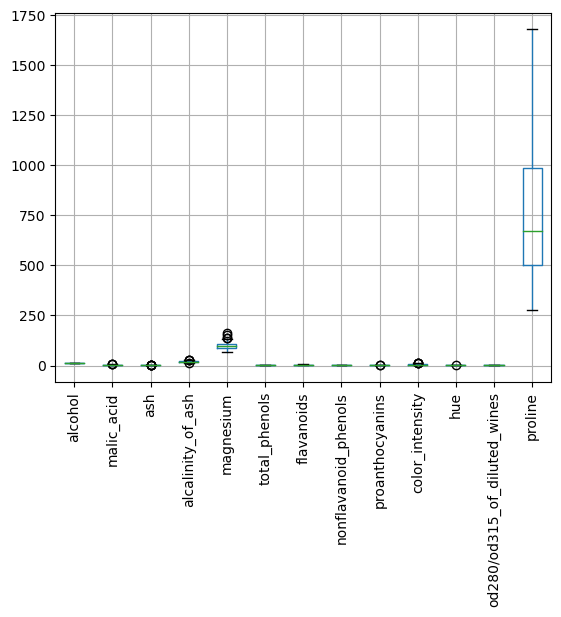

In [10]:
# Exploratory Data Analysis
# Visualize key statistics
## Your code starts here
df = pd.DataFrame(X, columns=feature_names) # creates a DataFrame with X and sets the column names to feature_names.
boxplot = df.boxplot() # boxplot of the data
plt.xticks(rotation=90)  # This rotates the columns, as it was hard to read but it also returns an array
## Your code ends here

**Question:** What do you see? What is the problem?

**You Answer:** Type your answer here!

---The boxplot visualization allows us to observe the distribution of each feature in the dataset. By displaying the spread of the data, including the median, quartiles, and any outliers. Howeever, The problem is taht the resulting graph is not effectively represent the distribution of each feature, since one the features (proline) have different scales or variances which is why I have difficulty in comparing them.


# Data Standardization:
**Coding excersice:** Standardize the original data (i.e., dataframe without considering data quality issues) and use the same boxplot to visualize the standardized data!

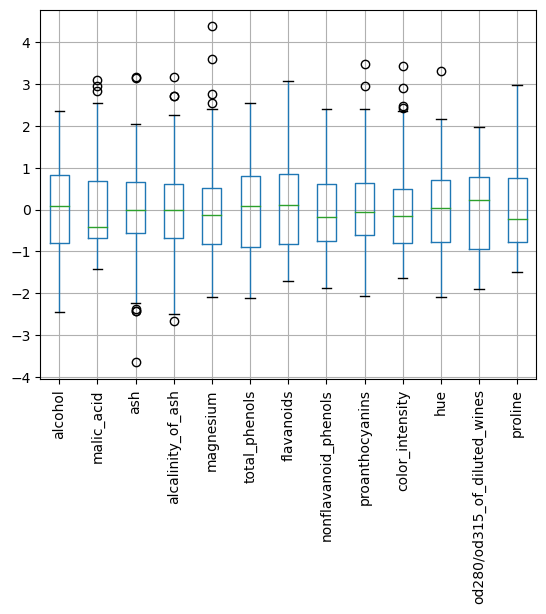

In [11]:
# Standardize the data
## Your code starts here
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Put the standardized data back into a DataFrame
df_standardized = pd.DataFrame(X_standardized, columns=feature_names)
## Your code ends here

# Exploratory Data Analysis
# Visualize key statistics
## Your code starts here
# Use boxplot to visualize the standardized features
boxplot_standardized = df_standardized.boxplot()
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()
## Your code ends here


**Question:** Was the problem resolved?

**You Answer:** Type your answer here!

---The problem was solved since standardization helps address these issues by scaling the features to have a mean of 0 and a standard deviation of 1, ensuring that they are on a similar scale. This way I can now compare the distributions and better interpret the data in visualizations.



**Coding excersice:** Calculate correlation matrix and visualize it?

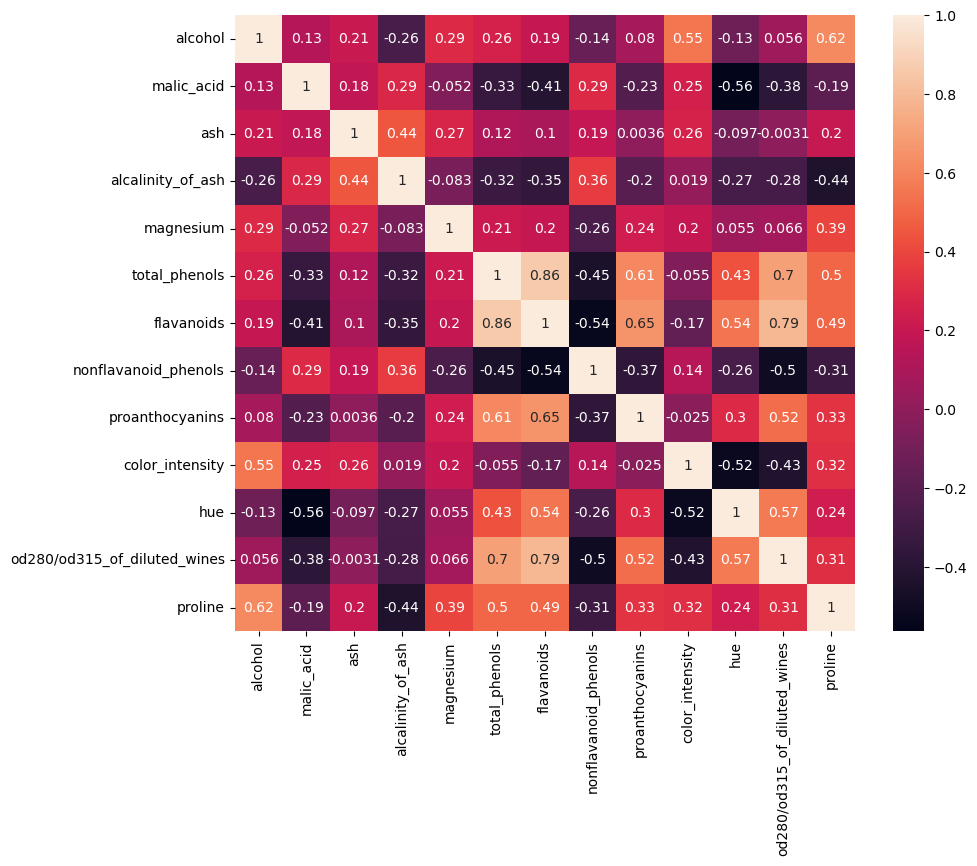

In [12]:
# Calculate correlation matrix
## Your code starts here
correlation_matrix = df.corr() #create a correlation matrix with the built in func called corr() (correlation coefficient ranges from -1 to 1)
## Your code ends here

# Visualize correlation matrix
## Your code starts here
plt.figure(figsize=(10, 8)) #changed size to make it more readable
sns.heatmap(correlation_matrix, annot=True) #annot = displays the correlation values
plt.show()
## Your code ends here

What is the intuition behind the correlation matrix?

**Your answer:** Type your answer here!

--- Each cell in the matrix contains a correlation coefficient, which measures the strength and direction of the linear relationship between two variables. A correlation coefficient closer to  1 signifies a strong positive linear relationship, wheras while a value close to -1 shows a neagtive strong linear relationship. As for Values that are closer to 0 would suggest likewise which is bascillay little to no linear relationship between the features.



# Dimensionality Reduction with PCA
**Coding excersice:** Apply Dimensionality Reduction using PCA. Find the number of principle components to retain using the "explained_variance_ratio". Use the threshold of **0.95** for the cumulative explained variance ratio in order to find the number of principle components.

**Note:** When performing dimensionality reduction using PCA, one of the main considerations is to select the appropriate number of principal components to retain. The explained variance ratio tells us the proportion of variance explained by each principal component. By summing up the explained variance ratios cumulatively, we can see how much of the total variance in the data is explained as we include more principal components.

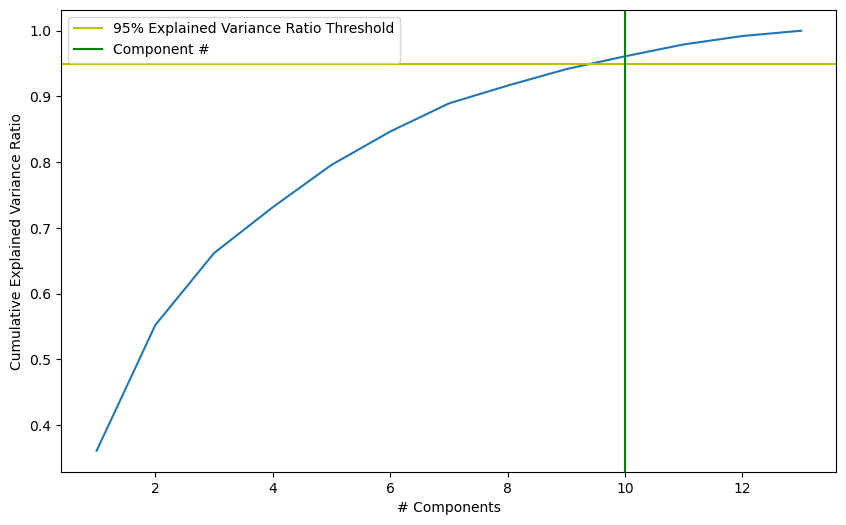

Number of principal components to retain: 10
Explained variance ratio of each principal component:
Component 1: 36.10906033543018%
Component 2: 19.12355428252497%
Component 3: 10.943262561266327%
Component 4: 6.976416307021179%
Component 5: 6.439245642630781%
Component 6: 5.072342654789727%
Component 7: 4.278798040599408%
Component 8: 2.7096746031537613%
Component 9: 2.5092073273720605%
Component 10: 1.9470333722516553%
PCA captures 96.10859512704006% of the variance with 10 components.


In [13]:
# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_standardized)

# Apply PCA
#created a PCA object without specifying the number of components, which means it will retain all the components.
# Then, fit the PCA model to the imputed standardized data X_imputed, which contains missing values handled by imputation.
# as for the function: fit_transform() it computes the principal components and transforms the data into the new feature space.
pca = PCA()
X_pca = pca.fit_transform(X_imputed)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of principal components to retain
num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio) 
plt.xlabel('# Components') #title for x 
plt.ylabel('Cumulative Explained Variance Ratio')#title for y
plt.axhline(y=0.95, color='y', label='95% Explained Variance Ratio Threshold') #plotting y - line 
plt.axvline(x=num_components, color='g', label='Component #') #plotting x - line
plt.legend() #show the labels
plt.show()

# Print the number of principal components taht  retained
print("Number of principal components to retain:", num_components)

# Perform PCA for the # of components
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_imputed)

# Interpret principal components
print("Explained variance ratio of each principal component:")
for i, explained_variance in enumerate(pca.explained_variance_ratio_):
    print("Component {}: {}%".format(i + 1, explained_variance * 100))

# Summarize key findings
print("PCA captures {}% of the variance with {} components.".format(
    cumulative_variance_ratio[num_components - 1] * 100, num_components))

**Congratulations!** You completed this assignment.


# Submission Guidelines:

* Implement the above steps in a Jupyter Notebook file.
* Save your ipython code and name it as: lastname_firstname_HW1.ipynb (.ipynb extension)
* Include comments and explanations to describe your approach and the rationale behind each step.
* Submit on Canvas.

